In [2]:
import sys
sys.path.append('/pl/active/banich/studies/Relevantstudies/abcd/env/lib/python3.7/site-packages')
sys.path.append('/pl/active/banich/studies/Relevantstudies/abcd/data/clustering/analysis/')

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_curve, auc
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# Generate sample data
X, y = make_classification(n_samples=1000, n_classes=2, random_state=42)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

# Create and fit four different models
models = [LogisticRegression() for _ in range(4)]
y_scores = []

for i, model in enumerate(models):
    model.fit(X_train, y_train)
    y_score = model.predict_proba(X_test)[:, 1]
    # Add variance to the scores to create different ROC curves
    y_score += np.random.normal(0, 0.1, size=y_score.shape) * (i + 1)  # Increase variance with each model
    y_scores.append(y_score)

# Compute ROC curve and ROC area for each model
fpr = []
tpr = []
roc_auc = []

for y_score in y_scores:
    fpr_i, tpr_i, _ = roc_curve(y_test, y_score)
    roc_auc_i = auc(fpr_i, tpr_i)
    fpr.append(fpr_i)
    tpr.append(tpr_i)
    roc_auc.append(roc_auc_i)

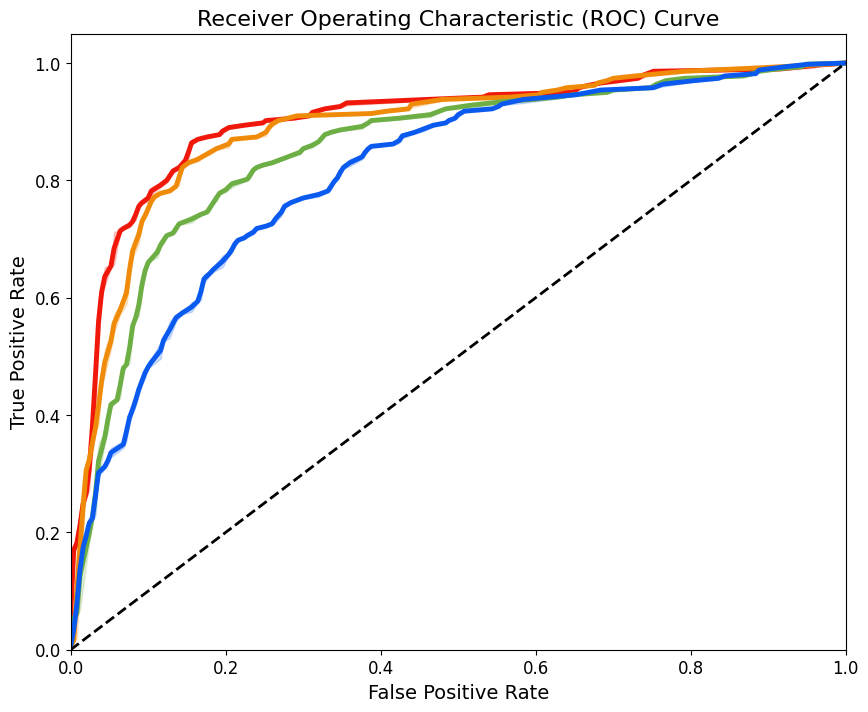

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_curve, auc
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# Generate sample data
X, y = make_classification(n_samples=1000, n_classes=2, random_state=42)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

# Create and fit four different models
models = [LogisticRegression() for _ in range(4)]
y_scores = []

for i, model in enumerate(models):
    model.fit(X_train, y_train)
    y_score = model.predict_proba(X_test)[:, 1]
    # Add variance to the scores to create different ROC curves
    y_score += np.random.normal(0, 0.1, size=y_score.shape) * (i + 1)  # Increase variance with each model
    y_scores.append(y_score)

# Compute ROC curve and ROC area for each model
fpr = []
tpr = []
roc_auc = []

for y_score in y_scores:
    fpr_i, tpr_i, _ = roc_curve(y_test, y_score)
    roc_auc_i = auc(fpr_i, tpr_i)
    fpr.append(fpr_i)
    tpr.append(tpr_i)
    roc_auc.append(roc_auc_i)

ops_cols = ['#F0180A', '#F08B0A', '#6DAE45', '#0A5AF0']

# Create the plot
plt.figure(figsize=(10, 8))

for i in range(4):
    sns.lineplot(x=fpr[i], y=tpr[i], color=ops_cols[i], linewidth=3.5)

# Plot the random chance line
plt.plot([0, 1], [0, 1], 'k--', lw=2)

# Customize the plot
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=14)
plt.ylabel('True Positive Rate', fontsize=14)
plt.title('Receiver Operating Characteristic (ROC) Curve', fontsize=16)
plt.tick_params(labelsize=12)  # Increase tick label size

# Show the plot
plt.show()


In [32]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap


# Define hex codes
net_cols = ['#FCFF0D', '#21DFB4', '#4E00A2', '#F00087']

# Convert hex codes to RGB colors with values in the range [0, 1]
rgb_colors = [tuple(int(h[i+1:i+3], 16) / 255 for i in (0, 2, 4)) for h in net_cols]

# Define color intervals
color_intervals = np.linspace(0, 1, 3)

# Create custom colormap
colors = list(zip(color_intervals, rgb_colors))
custom_cmap = LinearSegmentedColormap.from_list('derosa_wm_leiden_networks_2', colors)

# Register the custom colormap with Matplotlib
plt.register_cmap(cmap=custom_cmap)


In [33]:
color_intervals

array([0. , 0.5, 1. ])

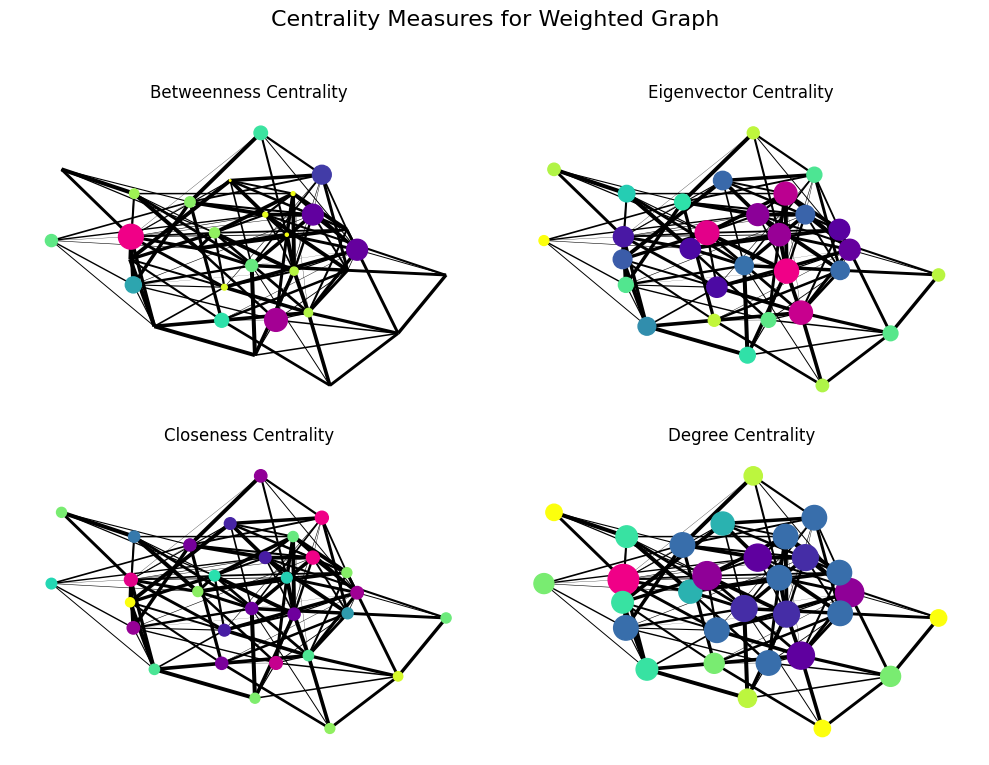

In [40]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

# Create a weighted graph
np.random.seed(42)
G = nx.erdos_renyi_graph(n=30, p=0.3, seed=2)
for (u, v) in G.edges():
    G.edges[u, v]['weight'] = np.random.randint(1, 30)

cmap = 'derosa_wm_leiden_networks'
# Calculate centrality measures
betweenness_centrality = nx.betweenness_centrality(G, weight='weight')
eigenvector_centrality = nx.eigenvector_centrality(G, weight='weight')
closeness_centrality = nx.closeness_centrality(G, distance='weight')
degree_centrality = nx.degree_centrality(G)

# Plotting the centrality measures
fig, axes = plt.subplots(2, 2, figsize=(10, 8))
fig.suptitle('Centrality Measures for Weighted Graph', fontsize=16)

pos = nx.spring_layout(G, seed=42, weight='weight')

# Betweenness Centrality
node_size = np.array([v * 1000 for v in betweenness_centrality.values()])
nx.draw(G, pos, ax=axes[0, 0], node_color=list(betweenness_centrality.values()), node_size=node_size, cmap=cmap, with_labels=False, width=[G[u][v]['weight']*0.1 for u,v in G.edges()])
axes[0, 0].set_title('Betweenness Centrality')

# Eigenvector Centrality
node_size = np.array([v * 1000 for v in eigenvector_centrality.values()])
nx.draw(G, pos, ax=axes[0, 1], node_color=list(eigenvector_centrality.values()), node_size=node_size, cmap=cmap, with_labels=False, width=[G[u][v]['weight']*0.1 for u,v in G.edges()])
axes[0, 1].set_title('Eigenvector Centrality')

# Closeness Centrality
node_size = np.array([v * 1000 for v in closeness_centrality.values()])
nx.draw(G, pos, ax=axes[1, 0], node_color=list(closeness_centrality.values()), node_size=node_size, cmap=cmap, with_labels=False, width=[G[u][v]['weight']*0.1 for u,v in G.edges()])
axes[1, 0].set_title('Closeness Centrality')

# Degree Centrality
node_size = np.array([v * 1000 for v in degree_centrality.values()])
nx.draw(G, pos, ax=axes[1, 1], node_color=list(degree_centrality.values()), node_size=node_size, cmap=cmap, with_labels=False, width=[G[u][v]['weight']*0.1 for u,v in G.edges()])
axes[1, 1].set_title('Degree Centrality')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()
